# 1. Introduction
## 1.1 Scoping
This project is meant to help the **National Park Service** to ensure the survival of at-risk species and to maintain the level of biodiversity within their parks. Therefore, the main objectives will be understanding the characteristics of the species and their conservation status. Some questions that are posed:
   - Which is the most endangered category of species?
   - Which is the most endangered specie?
   - Where can we find the most endangered specie?
   - Which park has the most significant number of observations?
   
## 1.2 Project descripiton
**Section 2** of this project presents data wrangling and tidying. This process leads to three data sets:
   - The `obs` data set includes the next information:
     - **scientific_name** - The scientific name of each species
     - **park_name** - The name of the national park
     - **observations** - The number of observations in the past 7 days
   - The `speciesInfo` data set includes the next information:
     - **scientific_name** - The scientific name of each species
     - **park_name** - The name of the national park
     - **observations** - The number of observations in the past 7 days
   - The `speciesObs` data set that contains all the information above.
 
**Section 3** presents the methods, the analyses, and the answers to the questions found in the **Scoping** subsection of the **Introduction** section by analyzing the conservation status of different species categories, the endangered species, the national parks where the observations of these species were conducted. The final section draws some **Conclusions**. 

# 2. Data
The information analyzed in this report is taken from two CSV files provided by [Codecademy.com](https://www.codecademy.com) learning platform:

   -   `species_info.csv` - contains data about different species and their conservation status
   -   `observations.csv` - holds recorded sightings of different species at several national parks for the past 7 days.

The columns in the `species info` data set include:
   - **category** - The category of taxonomy for each species
   - **scientific_name** - The scientific name of each species
   - **common_names** - The common names of each species
   - **conservation_status** - The species conservation status

The columns in the `observations` data set include:
   - **scientific_name** - The scientific name of each species
   - **park_name** - The name of the national park
   - **observations** - The number of observations in the past 7 days

The process of data wrangling is used to obtain a tidy dataset in order to prepare the data for gaining any useful insights. In this process, duplicates and missing values are identified and some data frame reshaping is needed.
The obtained tidy dataset has no duplicates but has 96.72% missing values in the `conservation status` variable. These missing values are too many to proceed a listwise or pairwise deletion and the variable contains important information, so we can not delete the entire variable either. As the missing data percent in the `conservation status` variable is approximatively 97% and the values of this variable can be `nan, 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'`, we can consider that `nan` could mean that the species are not in danger, so we can fill nan values with a `'Safe'` label. There are 5541 species in the dataset that are part of 7 categories. These species live in 4 national parks - `'Great Smoky Mountains National Park', 'Yosemite National Park', 'Yellowstone National Park', 'Bryce National Park'`.

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import string

In [116]:
# Data loading
obs = pd.read_csv('observations.csv')
speciesInfo = pd.read_csv('species_info.csv')

In [117]:
print("Species research: ")
print(speciesInfo.head())
print("Data shape: ")
print(speciesInfo.shape)
print("Number of duplicates: ")
print(speciesInfo.duplicated().sum())
print("Data info: ")
print(speciesInfo.info())
print("Unique values: ")
print(speciesInfo.nunique())
print("Percentage of missing conservation status data: ")
print(f"{speciesInfo.conservation_status.isna().sum()/speciesInfo.shape[0]*100}%")
print(f"Conservation status types: {speciesInfo.conservation_status.unique()}")
speciesInfo.conservation_status.fillna("Safe", inplace=True)
print(f"Conservation status types - after filling the missing values: {speciesInfo.conservation_status.unique()}")
print("Data info - after filling the missing values: ")
print(speciesInfo.info())

# Delete duplicates names in common_names column

# def remove_punctuations(text):
#     for punctuation in string.punctuation:
#         text = text.replace(punctuation, '')
#     return text

# commonNames = species_info.common_names\
#     .apply(remove_punctuations)\
#     .str.split().apply(lambda x: list(set(x)))
    
# print(commonNames)

Species research: 
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
Data shape: 
(5824, 4)
Number of duplicates: 
0
Data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ---

In [118]:
print("Observations research: ")
print(obs.head())
print("Data shape: ")
print(obs.shape)
print("Number of duplicates: ")
print(obs.duplicated().sum())
obs = obs.drop_duplicates()
print("Data shape - without duplicates")
print(obs.shape)
print("Data info: ")
print(obs.info())
print("Unique values: ")
print(obs.nunique())

Observations research: 
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
Data shape: 
(23296, 3)
Number of duplicates: 
15
Data shape - without duplicates
(23281, 3)
Data info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB
None
Unique 

In [119]:
speciesObs = pd.merge(obs, speciesInfo, how="outer", on=["scientific_name"])
print("Joint data research: ")
print(speciesObs.head())
print("Data shape: ")
print(speciesObs.shape)
print("Number of duplicates: ")
print(speciesObs.duplicated().sum())
speciesObs = speciesObs.drop_duplicates()
print("Data shape - without duplicates")
print(speciesObs.shape)
print("Data info: ")
print(speciesObs.info())
print("Unique values: ")
print(speciesObs.nunique())

Joint data research: 
      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                Safe  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                Safe  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                Safe  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                Safe  
4          Mammal                       American Mink                Safe  
Data shape: 
(25601, 6)
Number of duplicates: 
0
Data shape - wit

In [120]:
print(f"National parks: {speciesObs.park_name.unique()}")
print(f"Categories: {speciesObs.category.unique()}")
print(f"Conservation status types: {speciesObs.conservation_status.unique()}")

National parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']
Categories: ['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
Conservation status types: ['Safe' 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


In [121]:
print(f"number of species:{speciesObs.scientific_name.nunique()}")

number of species:5541


# 3. Methods and Analysis
## 3.1 Conservation status of different species categories
### 3.1.1 Description
There are 5 types of the `conservation status` variable -  `'Safe', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'` - and 7 `species categories` - `'Vascular Plant', 'Mammal', 'Bird', 'Nonvascular Plant', 'Amphibian', 'Reptile', 'Fish'`. The biggest number of endangered species are part of the `Mammal` and `Bird`  categories. There are 7 endangered `Mammal`  species and 4 endangered `Bird` species out of a total of 16 endangered species. Both `Bird` and `Mammal`  categories include species that represent a serious concern. There are 72 `Bird` species and 28 `Mammal` species out of a total of 161 species of concern. But there are 3 `Bird` species and 1 `Mammal` specie in recovery out of a total of 4. We can say that there are more `Mammal` endangered species and there are more `Bird` species of concern, but some `Birds` species recover faster than `Mammal` ones. 

### 3.1.2 Methods

Index(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile',
       'Vascular Plant'],
      dtype='object', name='category')
--------------------------------------------------------------------------------
category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


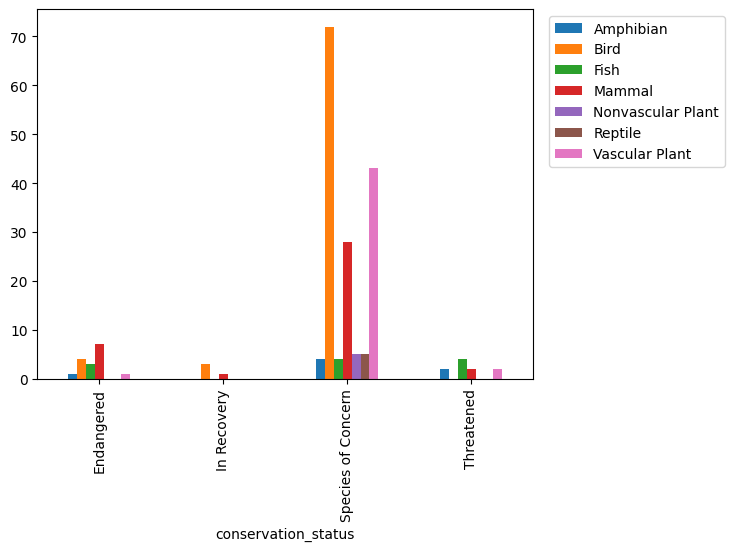

Total number of different categories per conservation status: 
conservation_status
Endangered             16.0
In Recovery             4.0
Species of Concern    161.0
Threatened             10.0
dtype: float64


<Figure size 640x480 with 0 Axes>

In [122]:
conservationCategory = speciesInfo[speciesInfo.conservation_status != "Safe"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()  
print(conservationCategory.columns)
print("-"*80)
print(conservationCategory)
conservationCategory.plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()
plt.clf()
print("Total number of different categories per conservation status: ")
print(conservationCategory.sum(axis=1))

## 3.2  Endangered species
### 3.2.1 Description
The percentage of endangered species that are part of the `mammal` category is 43.75% of the total endangered species. The most endangered specie that is part of this category is Canis lupus which represents 12.5% of the total endangered species. For seven days of observation, the biggest number of Canis Lupus, 660 specimens were found in Yellowstone National Park. 
### 3.2.2 Methods

In [123]:
endangered = speciesInfo[speciesInfo.conservation_status == "Endangered"]
print(endangered)
print("-"*80)
endangeredSpecies = endangered\
    .groupby(["scientific_name", "category"])['scientific_name']\
    .count()\
    .unstack()
print(endangeredSpecies)
print("-"*80)
print("Total number of different species per category:  ")
print(endangeredSpecies.sum())
print("-"*80)
print(f"Total endangered species: {endangeredSpecies.sum().sum()}")
print("-"*80)
endangered_mammals = (endangeredSpecies.sum()["Mammal"])/(endangeredSpecies.sum().sum()) * 100
print(f"The percentage of endangered species that are part of the `mammal` category:{endangered_mammals}%")
print("-"*80)
endangered_canis_lupus = (endangeredSpecies.Mammal[endangeredSpecies.index == "Canis lupus"])/(endangeredSpecies.sum().sum()) * 100
print(f"The percentage of endangered Canis lupus:{endangered_canis_lupus[0]}%")

            category               scientific_name  \
8             Mammal                   Canis lupus   
9             Mammal                   Canis rufus   
34            Mammal             Myotis grisescens   
39            Mammal                Myotis sodalis   
72            Mammal  Glaucomys sabrinus coloratus   
173             Bird                Grus americana   
276             Bird           Vermivora bachmanii   
343             Bird             Picoides borealis   
540             Fish          Etheostoma percnurum   
570             Fish               Noturus baileyi   
2497  Vascular Plant                 Geum radiatum   
3275            Fish             Chasmistes liorus   
4446          Mammal       Ovis canadensis sierrae   
4448          Mammal                   Canis lupus   
4505            Bird       Gymnogyps californianus   
4601       Amphibian                  Rana sierrae   

                                           common_names conservation_status  
8  

scientific_name  park_name                          
Canis lupus      Bryce National Park                    260
                 Great Smoky Mountains National Park    118
                 Yellowstone National Park              660
                 Yosemite National Park                 392
dtype: int64


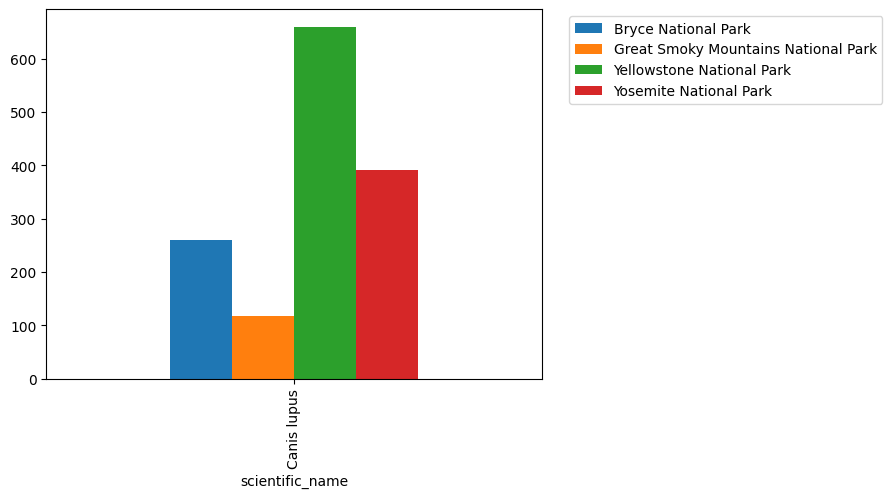

<Figure size 640x480 with 0 Axes>

In [124]:
canisLupus = speciesObs[(speciesObs.scientific_name == "Canis lupus") & (speciesObs.conservation_status == "Endangered")]\
    .groupby(["scientific_name", "park_name"])['observations']\
    .sum()\
    .unstack()
print(canisLupus.stack())
canisLupus.plot(kind="bar")
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1))
plt.show()
plt.clf()

## 3.3 National parks
### 3.3.1 Description
A total number of 102921 observations that live in 4 national parks were recorded for 7 days. These observations are classified as being part of a specific category such as:
   -   Species of Concern: declining or appear to need conservation
   - Threatened: vulnerable to endangerment soon
   - Endangered: seriously at risk of extinction
   - In Recovery: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

Yellowstone National Park has the greatest number of observed species of each category and a total percentage of 43.32%.

### 3.3.2 Methods

conservation_status                  Endangered  In Recovery  \
park_name                                                      
Bryce National Park                         619          388   
Great Smoky Mountains National Park         393          248   
Yellowstone National Park                  1558          889   
Yosemite National Park                      943          582   

conservation_status                  Species of Concern  Threatened  
park_name                                                            
Bryce National Park                               17011         591  
Great Smoky Mountains National Park               11735         440  
Yellowstone National Park                         40677        1459  
Yosemite National Park                            24539         849  


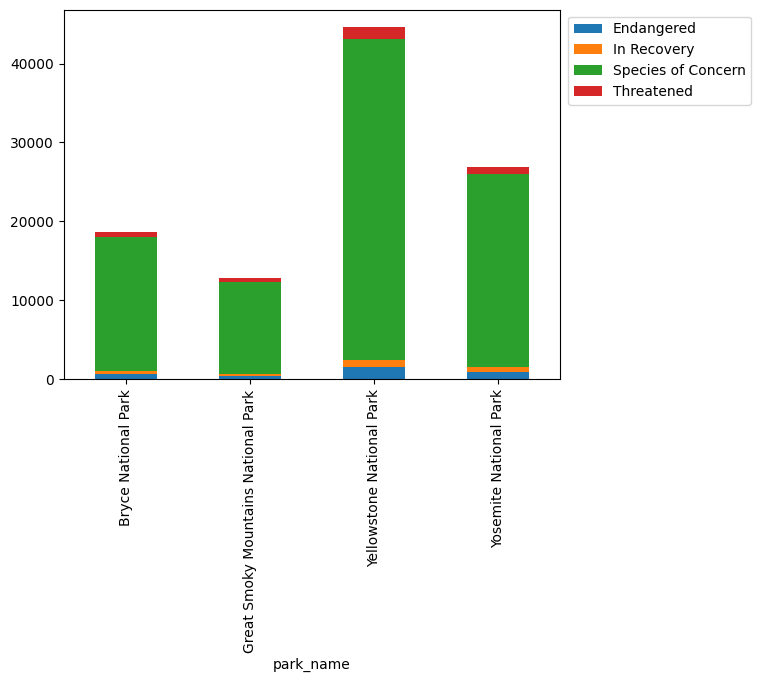

The total observations per national park that were recorded in those 7 days: 
park_name
Bryce National Park                    18609
Great Smoky Mountains National Park    12816
Yellowstone National Park              44583
Yosemite National Park                 26913
dtype: int64
The total observations that were recorded in those 7 days:  102921
The percentage of observations recorded in each national park through those 7 days: 
park_name
Bryce National Park                    18.080858
Great Smoky Mountains National Park    12.452269
Yellowstone National Park              43.317690
Yosemite National Park                 26.149182
dtype: float64


<Figure size 640x480 with 0 Axes>

In [125]:
parksObs = speciesObs[speciesObs.conservation_status != "Safe"]\
    .groupby(["park_name", "conservation_status"])["observations"]\
    .sum()\
    .unstack()
print(parksObs)
parksObs.plot(kind="bar", stacked=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()
plt.clf()
print("The total observations per national park that were recorded in those 7 days: ")
print(parksObs.sum(axis=1))
print(f"The total observations that were recorded in those 7 days:  {parksObs.sum(axis=1).sum()}")
print("The percentage of observations recorded in each national park through those 7 days: ")
print(parksObs.sum(axis=1) / parksObs.sum(axis=1).sum() * 100)

# 4. Conclusions

There are 5 types of the conservation status variable - 'Safe', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery' - and 7 species categories - 'Vascular Plant', 'Mammal', 'Bird', 'Nonvascular Plant', 'Amphibian', 'Reptile', 'Fish'. 

A total number of 102921 observations that live in 4 national parks - 'Great Smoky Mountains National Park', 'Yosemite National Park', 'Yellowstone National Park', 'Bryce National Park' - were recorded for 7 days. These observations are classified as being part of a specific category such as:

   - Species of Concern: declining or appear to need conservation
   - Threatened: vulnerable to endangerment soon
   - Endangered: seriously at risk of extinction
   - In Recovery: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

Yellowstone National Park has the greatest number of observed species of each category and a total percentage of 43.32%.


The biggest number of endangered species are part of the Mammal and Bird categories. There are 7 endangered Mammal species and 4 endangered Bird species out of a total of 16 endangered species. Both Bird and Mammal categories include species that represent a serious concern. There are 72 Bird species and 28 Mammal species out of a total of 161 species of concern. But there are 3 Bird species and 1 Mammal specie in recovery out of a total of 4. We can say that there are more Mammal endangered species and there are more Bird species of concern, but some Birds species recover faster than Mammal ones.

The percentage of endangered species that are part of the mammal category is 43.75% of the total endangered species. The most endangered specie that is part of this category is Canis lupus which represents 12.5% of the total endangered species. For seven days of observation, the biggest number of Canis Lupus, 660 specimens were found in Yellowstone National Park.


So, if you want to study Canis lupus, the most endangered specie found in the four presented national parks, go to Yellowstone National Park, where the probability to find some observations of this kind is higher.